### 문제 설명
- 필요하다고 생각하는 N개의 물건
- 각 물건은 무게 W와 가치 V
- 최대 K만큼의 무게를 들 수 있다
- 제한시간 2초

### 입력값
1. N K (1<= N <= 100, 1 <= K <= 100,000)
2. N개의 줄에 거쳐 W V (1<=W<=100,000,  0<=V<=1,000)

### 출력값
- 배낭에 넣을 수 있는 물건들의 가치합의 최댓값

In [ ]:
# dfs
# 시간초과~


def dfs(n,sum_w, sum_v) :
    global max_v
    
    # 종료조건
    if sum_w > K :
        if sum_v > max_v :
            max_v = sum_v
        return


    if n == N :
        if sum_v > max_v :
            max_v = sum_v
        return
    


    # 포함X
    dfs(n+1, sum_w, sum_v)

    # 포함O
    if sum_w + adj[n][0] <= K :
        sum_w += adj[n][0]
        sum_v += adj[n][1]
        dfs(n+1, sum_w, sum_v)



N, K = map(int,input().split())
adj = []
max_v = 0


for _ in range(N) :
    W,V = map(int,input().split())
    adj.append([W,V])

dfs(0,0,0)
print(max_v)



# DP 
- = 다이나믹 프로그래밍 = 동적 계획법
- 여기서 "동적"은 의미가 있는 것은 아님. 그냥 지었다고 함
- 원래 "동적 할당(Dynamic Allocation)"의 의미 : 프로그램이 실행되는 도중에 실행에 필요한 메모리를 할당하는 기법
- 하나의 큰 문제를 여러 개의 작은 문제로 나눈 뒤, 그 결과를 저장하여 다시 큰 문제를 해결할 때 사용
- 즉, 큰 문제를 작은 문제들로 쪼개서 그 답을 저장해두고 재활용하는 것
- 탑다운과 보텀업 방식이 있으며 보텀업 방식이 더 전형적인 형태


### DP 사용 조건
1. 최적 부분 구조
    - 큰 문제를 작은 문제로 나눌 수 있으며, 작은 문제의 답을 모아 큰 문제를 해결할 수 있다
2. 중복되는 부분 문제
    - 동일한 작은 문제의 해결을 반복적으로 사용할 수 있을 때

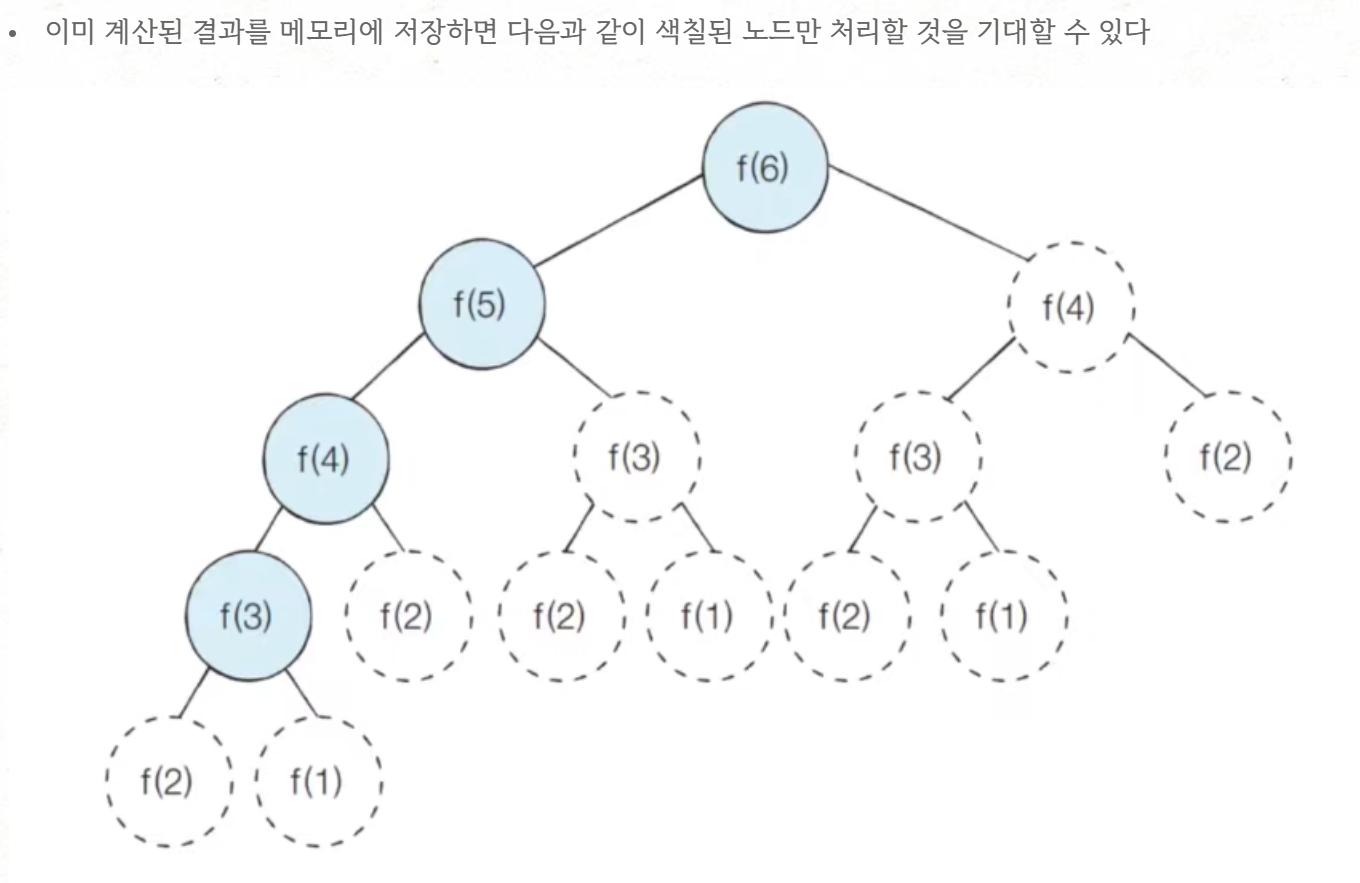

- 먼저 그리디, 구현, 완전 탐색 등의 아이디어로 문제를 해결할 수 있는지 검토해보고 풀이 방법이 떠오르지 않는다면 다이나믹 프로그래밍을 고려해보자

- 일단 재귀 함수로 비효율적인 완전 탐색 프로그램을 작성(탑다운)한 뒤 작은 문제에서 구한 답이 큰 문제에서 그대로 사용될 수 있으면 그 때 코드를 개선하는 방법을 사용할 수 있다


### 메모이제이션(Memoization)
- 다이나믹 프로그래밍을 구현하는 방법 중 하나
- 한 번 계산한 결과를 메모리 공간에 메모하는 기법
    - 다이나믹 프로그래밍 ≠ 메모이제이션
    - 같은 문제를 다시 호출하면 메모해둔(저장해둔) 결과를 그대로 가져온다
    - 값을 기록해놓는다는 점에서 캐싱(Caching)이라고도 한다


### 다이나믹 프로그래밍 vs 분할 정복
- 둘 다 최적 부분 구조를 가질 때 사용한다는 공통점이 있으나
- "부분 문제의 중복"에서 차이가 있다
- 다이나믹 프로그래밍에서는 각 부분의 문제들이 서로 영향을 미치며 부분 문제가 중복된다
- 분할 정복 문제에서는 동일한 부분 문제가 반복적으로 계산되지 않는다

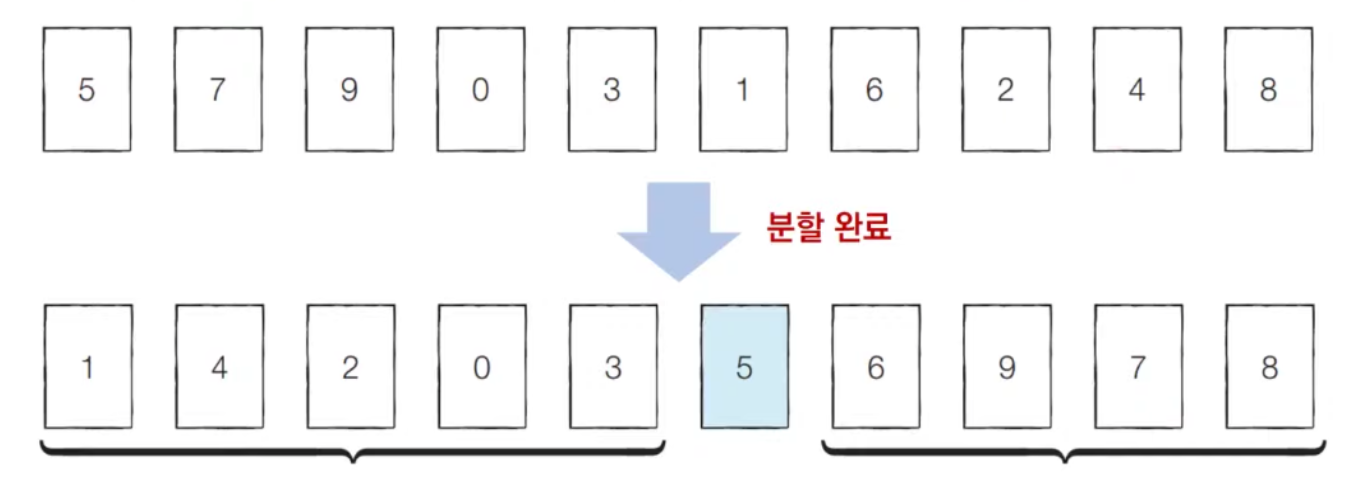

In [ ]:
# DP의 대표적인 예 : 피보나치 수열
# 탑다운방식(피보나치 함수는 재귀함수로 구현)

# 한 번 계산된 결과를 메모이제이션 하기 위한 리스트 초기화

dp = [0] * 6


def fibo(x) :
    # 종료 조건(1 혹은 2일 때 1을 반환, a1=1, a2=2)
    if x == 1 or x == 2 :
        return 1
    
    # 이미 계산한 값은 넘어가기
    if dp[x] != 0 :
        return dp[x]
    
    # 아직 계산하지 않았다면 점화식에 따라 피보나치 결과 반환

    dp[x] = fibo(x-1) + fibo(x-2)    
    return dp[x]


print(fibo(5))




: 

In [ ]:
# 보텀업 방식(반복문 사용)

# 앞서 계산된 결과를 저장하기 위한 DP 테이블 초기화
dp = [0] * 6

# dp 1과 2의 기본값 설정
dp[1] = dp[2] = 1
n = 5

# 피보나치 함수를 반복문으로 구현
for i in range(3, n+1) :
    dp[i] = dp[i-1] + dp[i-2]

print(dp[i])


In [ ]:
# 189916KB, 308ms(PyPy3)

N, K = map(int,input().split())
items = [[0,0]]
dp = [[0]*(K+1) for _ in range(N+1)]


# 상품의 무게와 가치를 기록하는 리스트

for _ in range(N) :
    W,V = map(int,input().split())
    items.append([W,V])


# items을 무게 기준으로 정렬
items = sorted(items)


for cn in range(1,N+1) :            # 현재 물건 순서 cn
    for cw in range(K+1) :        # 현재 물건의 무게 cw
        if cw < items[cn][0] :
            dp[cn][cw] = dp[cn-1][cw]       # 이전행의 값
        else :                  # cw >= items[cn][0] :
            # (현재 무게 - 현재 물건의 무게) 값의 저장된 가치 + 현재 물건의 가치 vs 현재 무게, 이전 물건까지의 가치
            dp[cn][cw] = max(dp[cn-1][cw-items[cn][0]]+items[cn][1], dp[cn-1][cw])
        

print(dp[N][K])

In [ ]:
# dp를 1차원 배열로 만들고 갱신하는 법
# 110328KB, 124ms


N,K = map(int,input().split())

items = []
for _ in range(N) :
    W,V = map(int,input().split())
    items.append([W,V])

# item 리스트 정렬
# items.sort(key=lambda x : x[0])
items = sorted(items)


# 1차원 dp 테이블
dp = [0] * (K+1)


for i in range(1, N+1) :       # 물건
    w,v = items[i-1]             # 역순으로 해야 값이 덮어씌여진 값으로 더해져 오류나는 것을 방지할 수 있음
    for j in range(K, w-1, -1) : # 무게 : 최대무게~ 현재무게까지 역순으로 확인.
        dp[j] = max(dp[j], dp[j-w]+v)   # 현재 저장된 값 vs (현재무게-현재물건무게)의 가치 + 현재물건의 가치                     
        
print(dp[K])


In [ ]:
# sorted 대신 lambda를 사용했을 때 비교
# 110328KB, 116ms
# lambda를 사용했을 때 메모리는 같지만 속도는 8ms 빠름. 유의미한 차이는 아님


N,K = map(int,input().split())

items = []
for _ in range(N) :
    W,V = map(int,input().split())
    items.append([W,V])

# item 리스트 정렬
# items.sort(key=lambda x : x[0])
items = sorted(items)


# 1차원 dp 테이블
dp = [0] * (K+1)


for i in range(1, N+1) :       # 물건
    w,v = items[i-1]             # 역순으로 해야 값이 덮어씌여진 값으로 더해져 오류나는 것을 방지할 수 있음
    for j in range(K, w-1, -1) : # 무게 : 최대무게~ 현재무게까지 역순으로 확인.
        dp[j] = max(dp[j], dp[j-w]+v)   # 현재 저장된 값 vs (현재무게-현재물건무게)의 가치 + 현재물건의 가치                     
        
print(dp[K])


출처 : https://freedeveloper.tistory.com/